In [82]:
import warnings, os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [83]:
states = gpd.read_file("cb_2016_us_state_20m")
states = states[~states['STUSPS'].isin(['AK', 'HI', 'PR'])]

In [84]:
plants = pd.read_csv("powerplants.csv")

In [85]:
plants = gpd.GeoDataFrame(
    plants,
    geometry=gpd.points_from_xy(plants.Longitude, plants.Latitude),
    crs="EPSG:4326"
)

In [16]:
states = states.to_crs("EPSG:5070")
plants = plants.to_crs("EPSG:5070")

In [17]:
plants.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,0.0,NaN,0.0,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201801,33.458665,-87.356823,POINT (796926.834 1190764.26)


In [18]:
states.head(1)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,23,01779787,0400000US23,23,ME,Maine,00,79885221885,11748755195,"MULTIPOLYGON (((2138225.742 2628218.402, 21414..."


<Axes: >

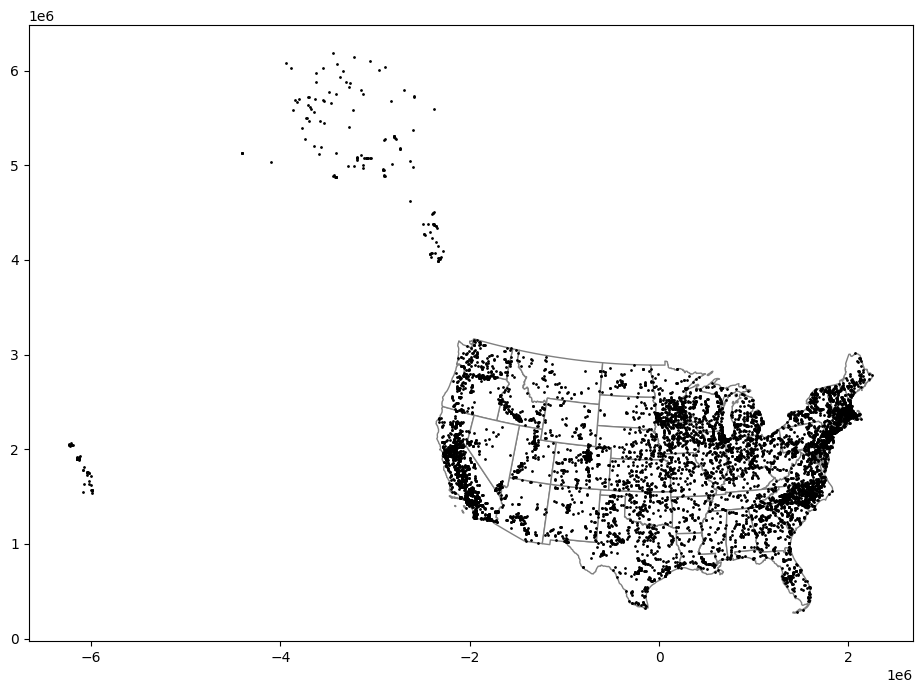

In [19]:
base = states.plot(color='white', edgecolor='gray', figsize=(12, 8))
plants.plot(ax=base, color='black', markersize=1)

In [20]:
plants.head(1)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,StateName,Zip,Street_Add,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,Alabama,35476,19001 Lock 17 Road,...,0.0,NaN,0.0,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201801,33.458665,-87.356823,POINT (796926.834 1190764.26)


In [21]:
plants['StateName'].unique()

array(['Alabama', 'Texas', 'Minnesota', 'California', 'Louisiana',
       'Kentucky', 'Nebraska', 'Alaska', 'New Mexico', 'New York',
       'Washington', 'Arizona', 'Kansas', 'South Carolina', 'Florida',
       'Nevada', 'Utah', 'Oklahoma', 'Arkansas', 'Illinois', 'Colorado',
       'Wyoming', 'Connecticut', 'Massachusetts', 'Vermont', 'Delaware',
       'Maryland', 'Georgia', 'Missouri', 'Hawaii', 'Idaho', 'Maine',
       'Indiana', 'North Carolina', 'Iowa', 'Michigan', 'Wisconsin',
       'Mississippi', 'Montana', 'New Hampshire', 'New Jersey',
       'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Tennessee', 'Virginia', 'West Virginia', nan],
      dtype=object)

In [22]:
plants.shape

(8616, 31)

In [23]:
plants = plants[plants['StateName'] != 'Alaska']
plants = plants[plants['StateName'] != 'Hawaii']

In [24]:
plants.shape

(8418, 31)

#### Map 1: Dot map

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

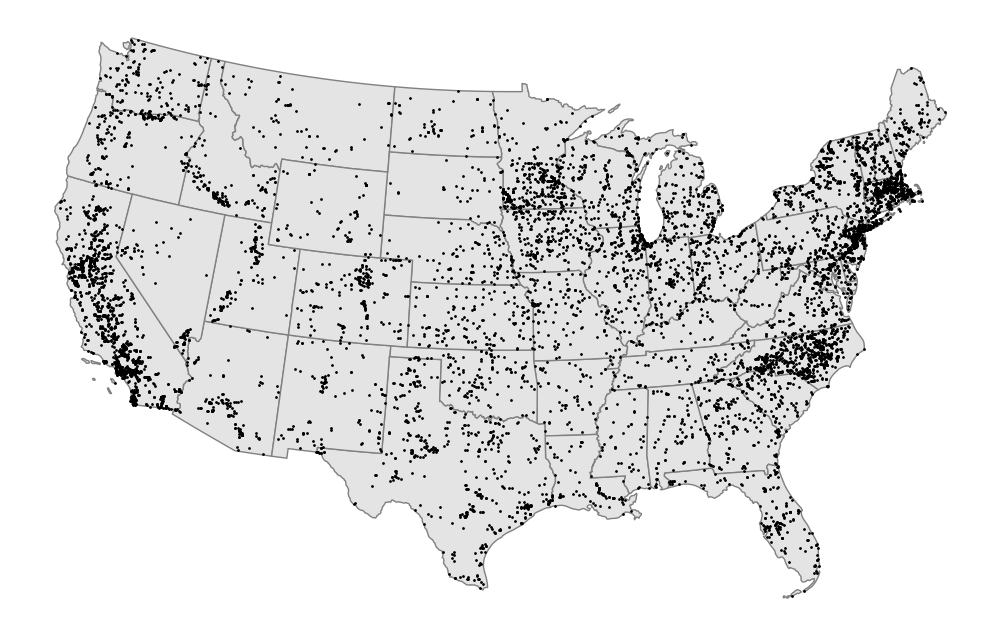

In [70]:
base = states.plot(color='#e4e4e4', edgecolor='gray', figsize=(15, 8))
plants.plot(ax=base, color='black', markersize=1)

plt.axis('off')

#### Map 2: Bubble map

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

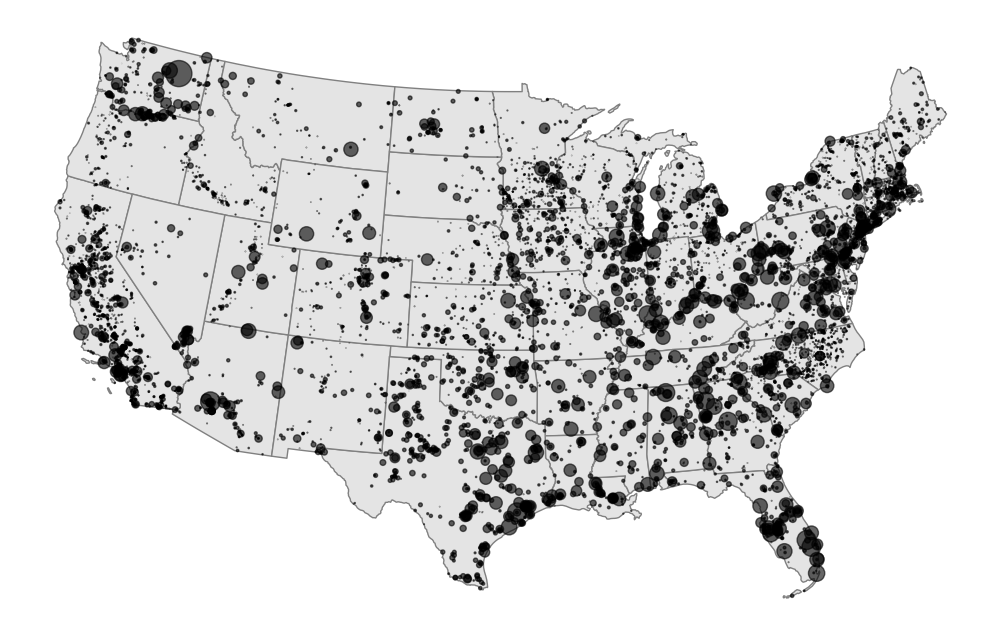

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))

states.plot(ax=ax, color='#e4e4e4', edgecolor='gray')

plants.plot(
    ax=ax,
    markersize=plants['Total_MW'] / 20, 
    color='black',
    alpha=0.6
)

plt.axis('off')

#### Map 3: Colored dot map

In [41]:
plants.dtypes

Plant_Code       int64
Plant_Name      object
Utility_Na      object
Utility_ID       int64
sector_nam      object
City            object
County          object
StateName       object
Zip              int64
Street_Add      object
PrimSource      object
Install_MW     float64
Total_MW       float64
Coal_MW        float64
NG_MW          float64
Crude_MW       float64
Bio_MW         float64
Hydro_MW       float64
HydroPS_MW     float64
Nuclear_MW     float64
Solar_MW       float64
Wind_MW        float64
Geo_MW         float64
Other_MW       float64
source_des      object
tech_desc       object
Source          object
Period           int64
Latitude       float64
Longitude      float64
geometry      geometry
dtype: object

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

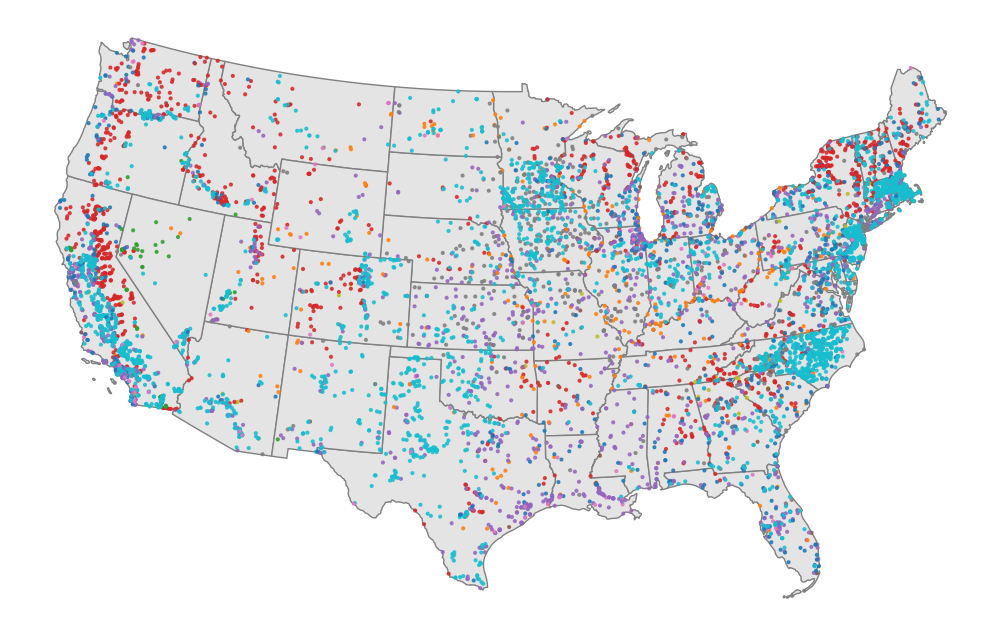

In [72]:
fig, ax = plt.subplots(figsize=(15, 8))

states.plot(ax=ax, color='#e4e4e4', edgecolor='gray')

plants.plot(
    ax=ax,
    column='PrimSource',   
    markersize=4,          
    cmap='tab10', 
    alpha=0.8
)

plt.axis('off')

#### Map 4: Colored bubble map

In [47]:
plants.dtypes

Plant_Code       int64
Plant_Name      object
Utility_Na      object
Utility_ID       int64
sector_nam      object
City            object
County          object
StateName       object
Zip              int64
Street_Add      object
PrimSource      object
Install_MW     float64
Total_MW       float64
Coal_MW        float64
NG_MW          float64
Crude_MW       float64
Bio_MW         float64
Hydro_MW       float64
HydroPS_MW     float64
Nuclear_MW     float64
Solar_MW       float64
Wind_MW        float64
Geo_MW         float64
Other_MW       float64
source_des      object
tech_desc       object
Source          object
Period           int64
Latitude       float64
Longitude      float64
geometry      geometry
dtype: object

In [51]:
plants['PrimSource'].unique()

array(['hydroelectric', 'natural gas', 'coal', 'nuclear',
       'pumped storage', 'petroleum', 'geothermal', 'biomass', 'wind',
       'other', 'solar'], dtype=object)

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

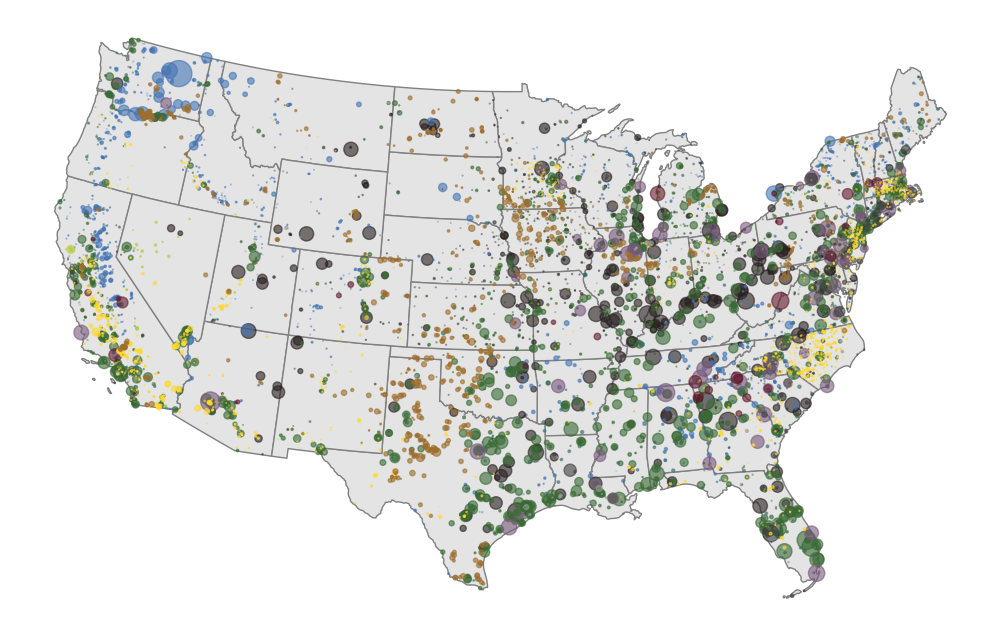

In [69]:
fig, ax = plt.subplots(figsize=(15, 8))

states.plot(ax=ax, color='#e4e4e4', edgecolor='gray')

color_dict = {
    'hydroelectric': '#4575b4',
    'natural gas': "#396a35",
    'coal': "#292020",
    'nuclear': "#78597c",
    'pumped storage': "#631b2b97", 
    'petroleum': "#404040ff", 
    'geothermal': "#b8cd45", 
    'biomass': "#43737e",
    'wind': "#9d6f2e",
    'solar': '#ffd92f',
    'other': '#999999',

}

plants['PrimSource'] = plants['PrimSource'].fillna('Other')

for source, group in plants.groupby('PrimSource'):
    group.plot(
        ax=ax,
        markersize=group['Total_MW'] / 20, 
        color=color_dict.get(source, '#cccccc'),
        label=source,
        alpha=0.6
    )

plt.axis('off')

#### Map 5: Coal only

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

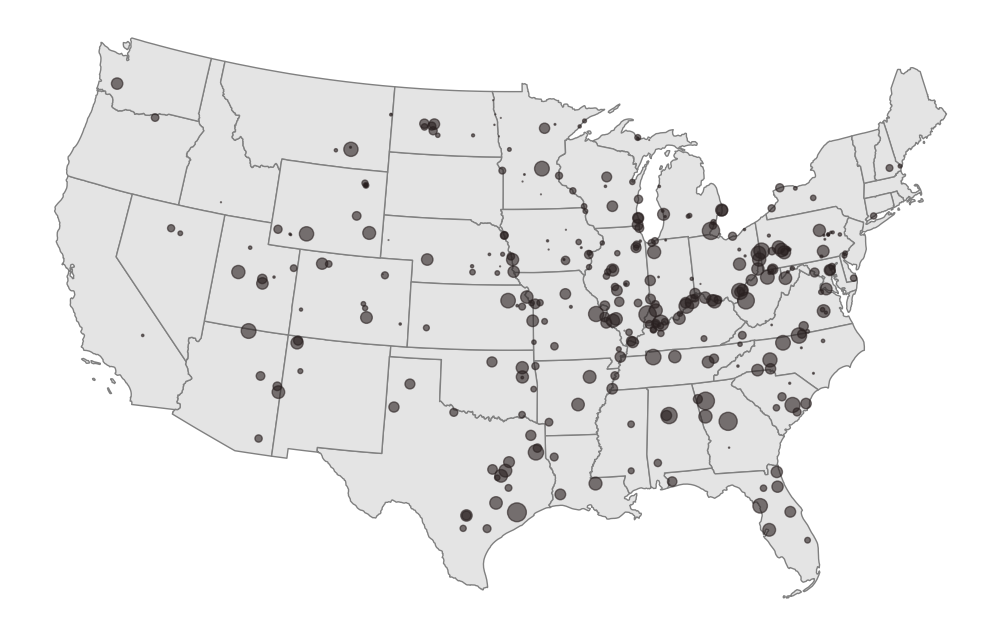

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))

states.plot(ax=ax, color='#e4e4e4', edgecolor='gray')

coal = plants[plants['PrimSource'] == 'coal']

coal.plot(
    ax=ax,
    markersize=coal['Total_MW'] / 20,
    color='#292020',
    alpha=0.6
)

plt.axis('off')

#### Map 6: Solar only

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

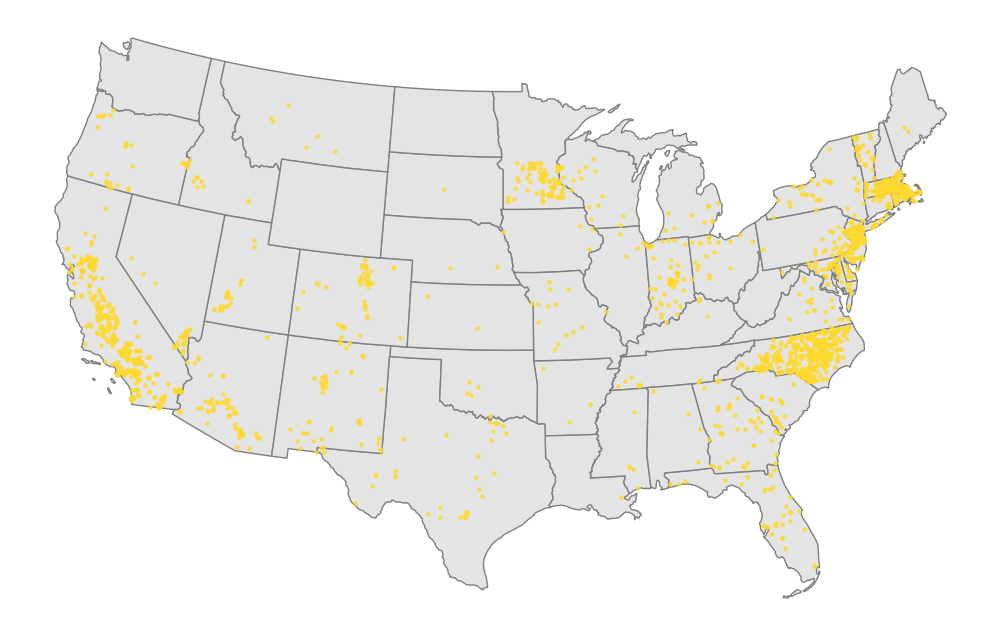

In [66]:
fig, ax = plt.subplots(figsize=(15, 8))

states.plot(ax=ax, color="#e4e4e4", edgecolor='gray')

solar = plants[plants['PrimSource'] == 'solar']

solar.plot(
    ax=ax,
    color='#ffd92f',       
    markersize=5,
    alpha=0.8
)

plt.axis('off')

#### Map 7: Solar choropleth

In [73]:
solar.dtypes

Plant_Code       int64
Plant_Name      object
Utility_Na      object
Utility_ID       int64
sector_nam      object
City            object
County          object
StateName       object
Zip              int64
Street_Add      object
PrimSource      object
Install_MW     float64
Total_MW       float64
Coal_MW        float64
NG_MW          float64
Crude_MW       float64
Bio_MW         float64
Hydro_MW       float64
HydroPS_MW     float64
Nuclear_MW     float64
Solar_MW       float64
Wind_MW        float64
Geo_MW         float64
Other_MW       float64
source_des      object
tech_desc       object
Source          object
Period           int64
Latitude       float64
Longitude      float64
geometry      geometry
dtype: object

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

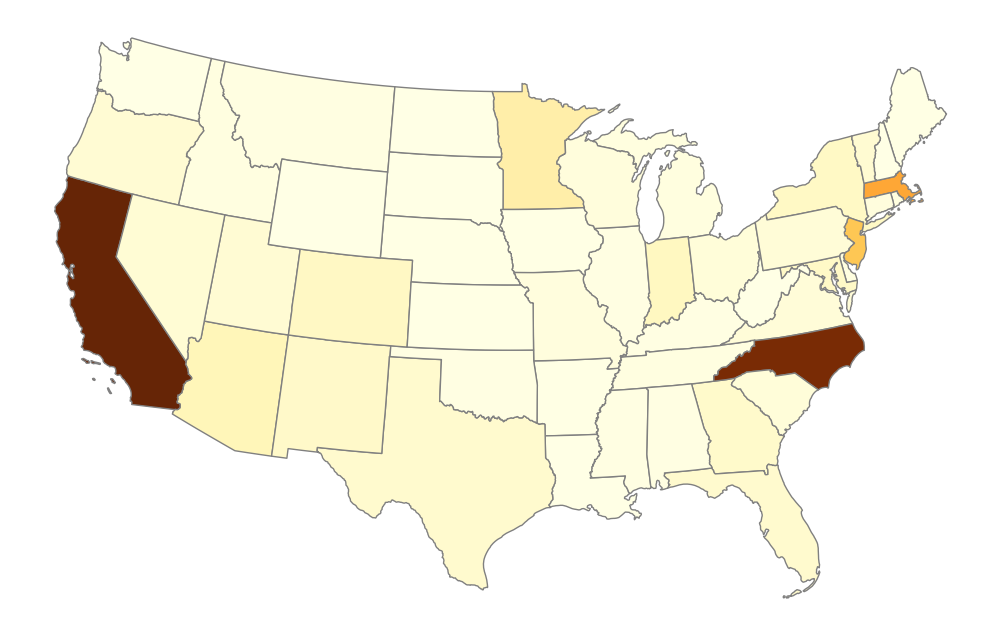

In [76]:
solar_joined = gpd.sjoin(solar, states, how='left', predicate='within')

solar_count = solar_joined.groupby('StateName').size().reset_index(name='solar_count')

states_with_solar = states.merge(solar_count, left_on='NAME', right_on='StateName', how='left')
states_with_solar['solar_count'] = states_with_solar['solar_count'].fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))
states_with_solar.plot(
    ax=ax,
    column='solar_count',
    cmap='YlOrBr',
    edgecolor='gray'
)

plt.axis('off')

#### Map 8: Coal choropleth

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

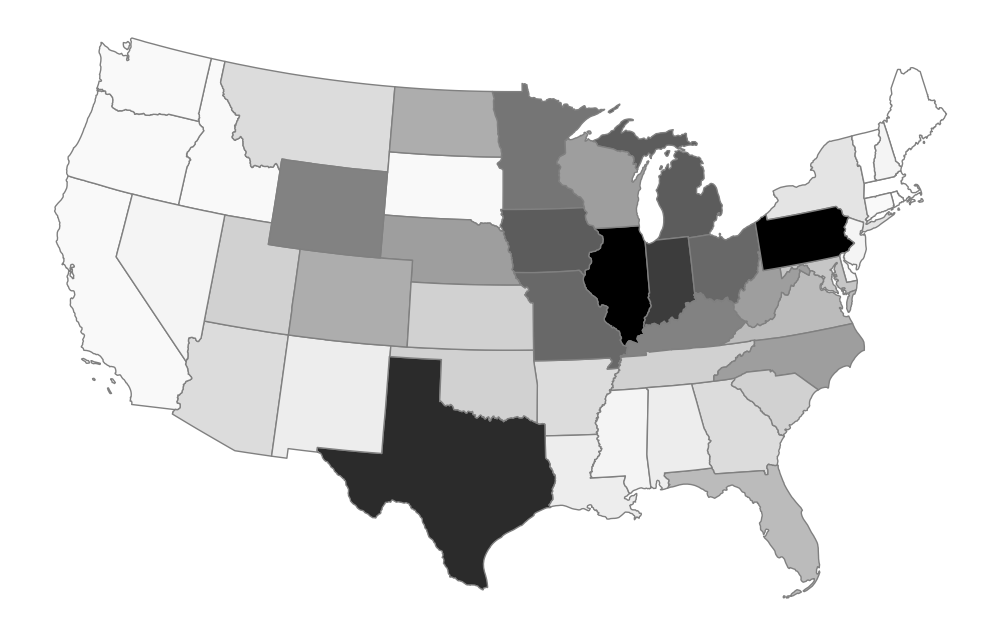

In [79]:
coal_joined = gpd.sjoin(coal, states, how='left', predicate='within')

coal_count = coal_joined.groupby('StateName').size().reset_index(name='coal_count')

states_with_coal = states.merge(coal_count, left_on='NAME', right_on='StateName', how='left')
states_with_coal['coal_count'] = states_with_coal['coal_count'].fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))
states_with_coal.plot(
    ax=ax,
    column='coal_count',
    cmap='Greys',
    edgecolor='gray'
)

plt.axis('off')

#### Map 9: Power output by state

(-2586827.152087886, 2488867.850089355, 123807.82594247095, 3310574.6893768157)

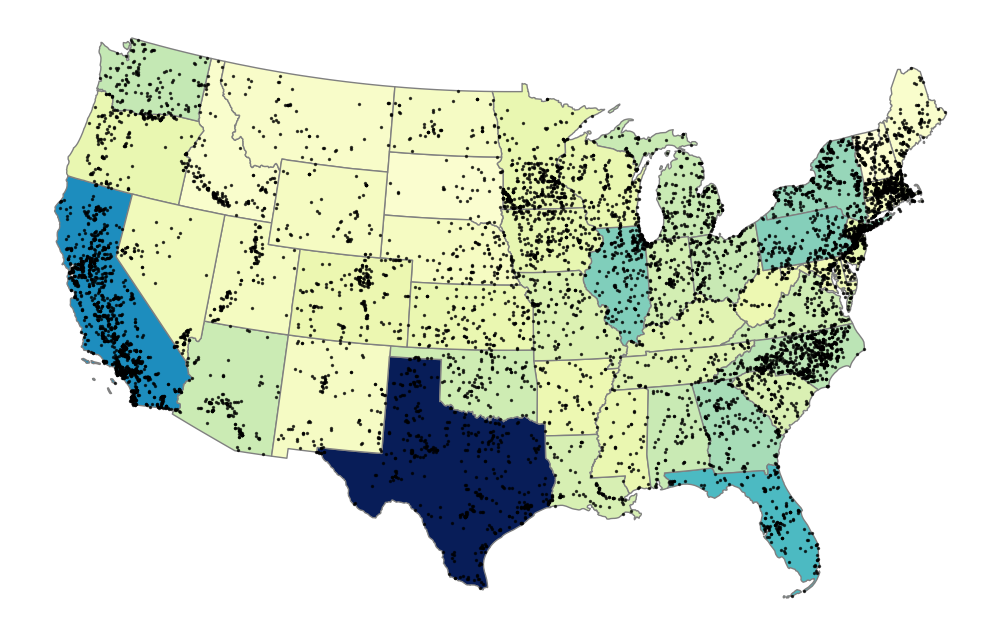

In [81]:
plants_joined = gpd.sjoin(plants, states, how='left', predicate='within')

total_mw = plants_joined.groupby('StateName')['Total_MW'].sum().reset_index()

states_with_mw = states.merge(total_mw, left_on='NAME', right_on='StateName', how='left')
states_with_mw['Total_MW'] = states_with_mw['Total_MW'].fillna(0)

fig, ax = plt.subplots(figsize=(15, 8))

states_with_mw.plot(
    ax=ax,
    column='Total_MW',
    cmap='YlGnBu',
    edgecolor='gray'
)

plants.plot(
    ax=ax,
    color='black',
    markersize=2,
    alpha=0.7
)

plt.axis('off')